In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read(10000))  # Analyze first 10,000 bytes
    return result['encoding']

# Load file with the correct encoding
def load_csv(file_path):
    encoding = detect_encoding(file_path)
    print(f"Detected encoding: {encoding}")
    try:
        data = pd.read_csv(file_path, encoding=encoding)
        print("CSV file loaded successfully!")
        return data
    except Exception as e:
        print(f"Error loading CSV: {e}")
        return None

In [8]:
file_path = "sales_data_sample.csv"

data = load_csv(file_path)

Detected encoding: Windows-1252
CSV file loaded successfully!


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [10]:
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [11]:
data.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [14]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [13]:
for column in data.columns:
    print(f"{column}: {data[column].nunique()} unique values")

ORDERNUMBER: 307 unique values
QUANTITYORDERED: 58 unique values
PRICEEACH: 1016 unique values
ORDERLINENUMBER: 18 unique values
SALES: 2763 unique values
ORDERDATE: 252 unique values
STATUS: 6 unique values
QTR_ID: 4 unique values
MONTH_ID: 12 unique values
YEAR_ID: 3 unique values
PRODUCTLINE: 7 unique values
MSRP: 80 unique values
PRODUCTCODE: 109 unique values
CUSTOMERNAME: 92 unique values
PHONE: 91 unique values
ADDRESSLINE1: 92 unique values
ADDRESSLINE2: 9 unique values
CITY: 73 unique values
STATE: 16 unique values
POSTALCODE: 73 unique values
COUNTRY: 19 unique values
TERRITORY: 3 unique values
CONTACTLASTNAME: 77 unique values
CONTACTFIRSTNAME: 72 unique values
DEALSIZE: 3 unique values


In [16]:
data.isnull().any()

ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
ORDERDATE           False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool

In [15]:
null_columns = data.isnull().sum()
null_columns = null_columns[null_columns > 0]

print(null_columns)

ADDRESSLINE2    2521
STATE           1486
POSTALCODE        76
TERRITORY       1074
dtype: int64


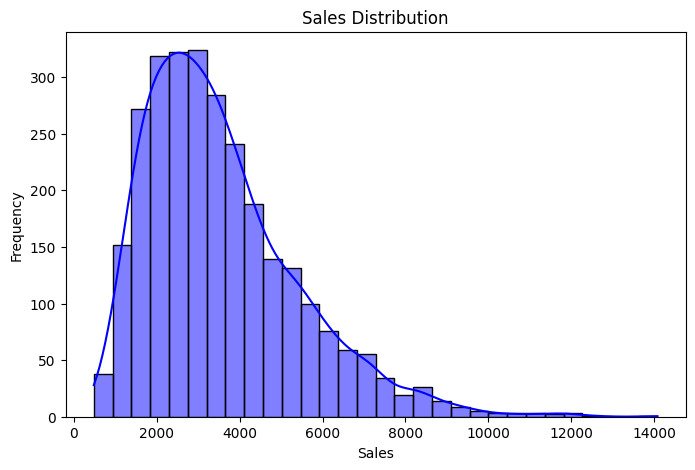

In [ ]:
# Histogram for Sales column
plt.figure(figsize=(8, 5))
sns.histplot(data['SALES'], bins=30, kde=True, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()


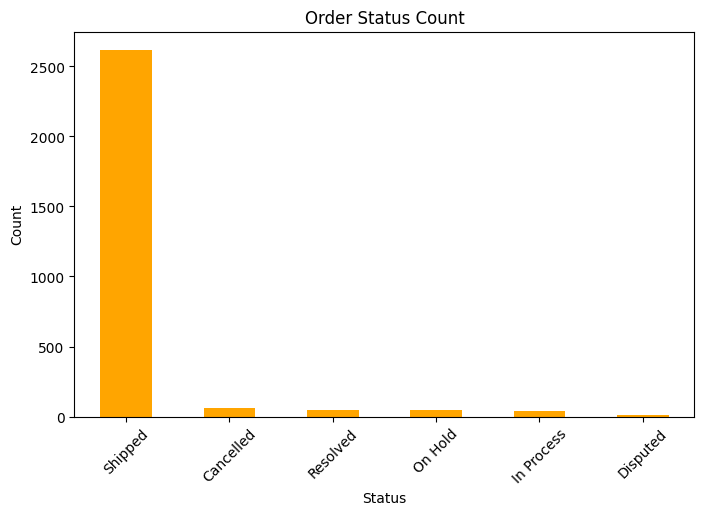

In [18]:
# Bar plot for Order Status counts
plt.figure(figsize=(8, 5))
data['STATUS'].value_counts().plot(kind='bar', color='orange')
plt.title('Order Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


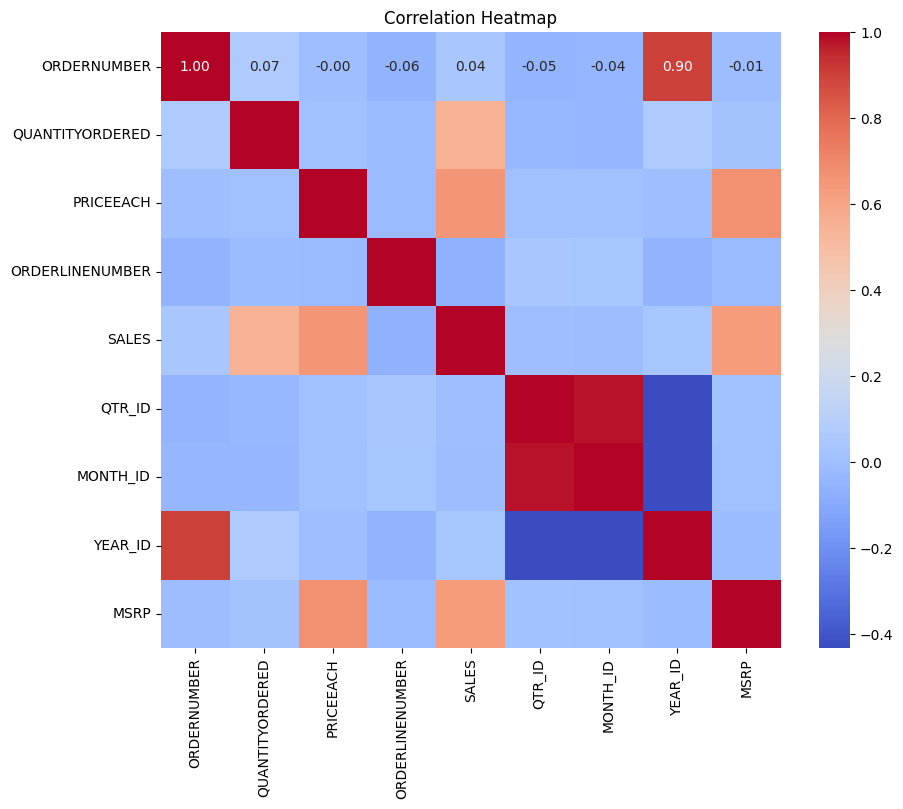

In [21]:
# Heatmap for correlation matrix
correlation_matrix = data.corr(numeric_only=True)
# print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
